In [151]:
#  Import packages

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# plt.style.use('ggplot')  
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [152]:
datatrain = pd.read_csv('fraud_dataset.csv', encoding='latin-1')
datatrain = datatrain.iloc[:150000]

datatrain1 = pd.read_csv('train_dataset.csv', encoding='latin-1')
datatrain1 = datatrain1.drop(columns='level_0')
datatest = pd.read_csv('test_dataset.csv', encoding='latin-1')
datatest = datatest.drop(columns='level_0')
datavalid = pd.read_csv('valid_dataset.csv', encoding='latin-1')
datavalid = datavalid.drop(columns='level_0')

In [153]:
datatrain.loc[:, 'day'] = pd.to_datetime(datatrain.datetime).dt.day
datatrain.loc[:, 'time'] = pd.to_datetime(datatrain.datetime).dt.second + pd.to_datetime(datatrain.datetime).dt.minute*60 + pd.to_datetime(datatrain.datetime).dt.hour*3600



datatrain = datatrain.drop(columns="datetime")

In [154]:
len(datatrain.columns)

40

In [156]:
len(datatrain1.columns)

40

<AxesSubplot:ylabel='fraud'>

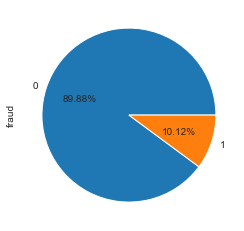

In [105]:
datatrain['fraud'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
#atatest['fraud'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
#datavalid['fraud'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')

In [83]:
datatrain['hour'] = pd.to_datetime(datatrain['datetime']).dt.hour
datatrain.drop('datetime', axis = 1, inplace = True)

datatest['hour'] = pd.to_datetime(datatest['datetime']).dt.hour
datatest.drop('datetime', axis = 1, inplace = True)

datavalid['hour'] = pd.to_datetime(datavalid['datetime']).dt.hour
datavalid.drop('datetime', axis = 1, inplace = True)

KeyError: 'datetime'

In [84]:
train_columns = [col for col in datatrain.columns if col != 'fraud']

In [67]:
def skf(data, n_splits):
  ones = data[data.fraud == 1].index
  zeros = data[data.fraud == 0].index
  ratio = len(ones)/len(zeros)
  pas = len(data)// n_splits
  pas_normal = int(pas/(1+ratio))
  pas_anormal = int(ratio * pas_normal)
  data['fold_id'] = 0
  i,j = 0,0
  
  for index in range(n_splits):
    #print(i,j)
    data.loc[zeros[i:i+pas_normal], 'fold_id'] = index
    data.loc[ones[j:j+pas_anormal], 'fold_id'] = index
    i += pas_normal
    j += pas_anormal
  return data 

In [157]:


#x_train=data.iloc[:150000]
#x_train= datatrain[x_train.fraud==0]
x_train=datatrain.drop(columns='fraud', axis=1)
y_train = datatrain['fraud']
x_test= datatest.drop(columns='fraud', axis=1)
y_test = datatest['fraud']
x_valid= datavalid.drop(columns='fraud', axis=1)
y_valid = datavalid['fraud']
x_train1=datatrain1.drop(columns='fraud', axis=1)
y_train1 = datatrain1['fraud']

In [158]:
from sklearn.svm import SVC

In [159]:
len(x_train)

99998

In [167]:
svcmodel1 = SVC(kernel='sigmoid')
svcmodel1.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [169]:

ypredtrain = svcmodel1.predict(x_train1)
ypredvalid = svcmodel1.predict(x_valid)
ypredtest = svcmodel1.predict(x_test)

In [176]:
ypredvalid

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [174]:
sum(abs(ypredtest-y_test))/50000

0.0434

results = pd.dataframe(ypredtrain, "predfraud")

In [183]:
predtrain = pd.DataFrame (ypredtrain, columns =["predfraud"])
predvalid = pd.DataFrame (ypredvalid, columns =["predfraud"])
predtest = pd.DataFrame (ypredtest, columns =["predfraud"])

In [184]:
predtrain.to_csv("trainSVM.csv")
predvalid.to_csv("validSVM.csv")
predtest.to_csv("tesTSVM.csv")